## SIR model

This is a classical model of the evolution of a disease in a population.
In the last few years, many researchers have been furiously working to fit the emerging COVID-19 data into variants of the SIR model.

we start with the following variables:

* **S** susceptible, healthy subjects that can be infected
* **I** infected subjects, able to infect susceptible if they meet
* **R** resistant, subjects that have survived the illness and can not be infected again
* **D** deceased, subjects that did not survive the infection

there is one non linear interaction, due to the chance encounter between susceptible and infected.

The easiest way to model this is with a simple product of the two.

We will represent all the populations using normalized concentrations.

**Note:** there is also a slight different model called **SEIR** in which is included an extra class (**E** variable) which represents the individuals who are exposed to the disease and manifest an incubation period of latency.
This class is used to simulate pandemic spread like COVID-19.

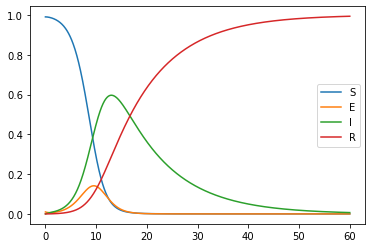

In [89]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint

def SEIR_model(state : tuple, time : np.ndarray, 
               β : float, σ : float, γ : float) -> tuple:
    S, E, I, R = state
    δS = - β*I*S
    δE = + β*I*S - σ*E
    δI = + σ*E - γ*I
    δR = + γ*I
    
    return δS, δE, δI, δR 
    
time = np.linspace(0, 60, 1000)
state0 = (0.99, 0.01, 0.0, 0.0)
β, σ, γ = 1, 1, 0.1

res = odeint(SEIR_model, y0=state0, t=time, args=(β, σ, γ))
S_hat, E_hat, I_hat, R_hat = zip(*res)

plt.plot(time, S_hat, label='S')
plt.plot(time, E_hat, label='E')
plt.plot(time, I_hat, label='I')
plt.plot(time, R_hat, label='R')

plt.legend()

In the study of evolution of dynamical systems like the SIR model, equilibria play an important role. 
An equilibrium state is a value of the state (i.e., values of $S$, $E$, $I$, and $R$) for which the rate of change is equal to zero, i.e., if the system happens to enter an exact equilibrium, then it no longer changes.

For our SIR system, an equilibrium state (excercise!) is statisfied *only* if 

$$
S = constant \quad I = E = 0 \quad R = constant
$$

In other words, since $D = I = 0$, all equilibria of our model are **disease-free equilibria**. 

There are other scenarios where an infection persists and never quite disappears from the population. 
Such equilibria where the disease is endemic are sometimes called **endemic equilibria**.

As an example, suppose our model represents a city's population, and suppose travel into and out of the city is allowed. 
Then we must add terms that represent the influx of travelers in each category (the number of people entering minus the number of people leaving). 
Even if we assume that infected people do not travel, a small influx into susceptible category $S$ will disturb the disease-free equilibrium of our model.

Let us add terms $a$ and $b$ representing these influxes and see what happens.

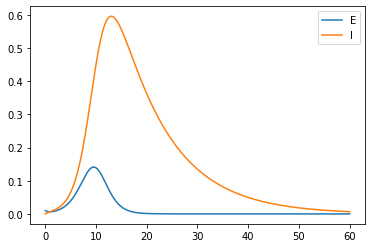

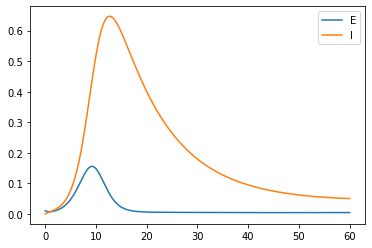

In [74]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint

def SEIR_model(state : tuple, time : np.ndarray, 
               β : float, σ : float, γ : float,
               a : float, b : float) -> tuple:
    S, E, I, R = state
    δS = - β*I*S + a
    δE = + β*I*S - σ*E + b
    δI = + σ*E - γ*I
    δR = + γ*I - (a + b)
    
    return δS, δE, δI, δR 
    
time = np.linspace(0, 60, 1000)
state0 = (0.99, 0.01, 0.0, 0.0)
β, σ, γ = 1, 1, 0.1
a, b = 0, 0

res = odeint(SEIR_model, y0=state0, t=time, args=(β, σ, γ, a, b))
S_hat, E_hat, I_hat, R_hat = zip(*res)

plt.figure(0)
plt.plot(time, E_hat, label='E')
plt.plot(time, I_hat, label='I')

plt.legend()

a, b = 0.005, 0.001
res = odeint(SEIR_model, y0=state0, t=time, args=(β, σ, γ, a, b))
S_hat, E_hat, I_hat, R_hat = zip(*res)

plt.figure(1)
plt.plot(time, E_hat, label='E')
plt.plot(time, I_hat, label='I')

plt.legend()

As you can see from this output, the percentage of the population with the disease now remains at around 5% and never quite vanishes, an example of an endemic equilibrium.

### The emergence of $R_0$

A number that emerges from models like the SIR (or SEIR model), called  $R_0$, or the basic reproduction number often makes its appearance in popular science.
The epidemiological definition of $R_0$ is the average number of secondary cases produced by one infected individual introduced into a population entirely of susceptible individuals. 
One suspects from this definition that if $R_0 > 1$, then there will be an epidemic outbreak. 
We will see that this number also naturally emerges from a mathematical model.

The stability of equilibria is another important consideration in the study of dynamical systems. 
Loosely speaking, an equilibrium is considered stable if a solution, when perturbed from the equilibrium, moves back to it over time. 

suppose we want to guess the stability of one of the previously discussed disease-free equilibrium states,

$$
S = S_0 \quad I = E = 0 \quad R = R_0
$$

where $S_0$ and $R_0$ are some constants.

Adding the $E$ and $I$ equations we observe that

$$
\frac{d(E + I)}{dt} = (\beta S - \gamma) I
$$

Thus, despite a perturbation brought about by a small surge in the infected population (resulting in a small positive $I$ value), if the above derivative is negative, i.e., if

$$
\beta S_0 - \gamma < 0
$$

then, the value of $E+I$ will decrease to its equilibrium value. 
This simple argument already hints at the relevance of the number

$$
R_0 = \frac{\beta}{\gamma}S_0
$$

which is the basic reproductive number for this model. 
In some texts, $R_0$ is defined (to match the epidemiological definition) using an initial population that is $100%$ susceptible, in which case $S_0 = 1$ and $R_0=\beta/\gamma$.

## Reference

* http://web.pdx.edu/~gjay/teaching/mth271_2020/html/09_SEIR_model.html

## 2D diffusion model

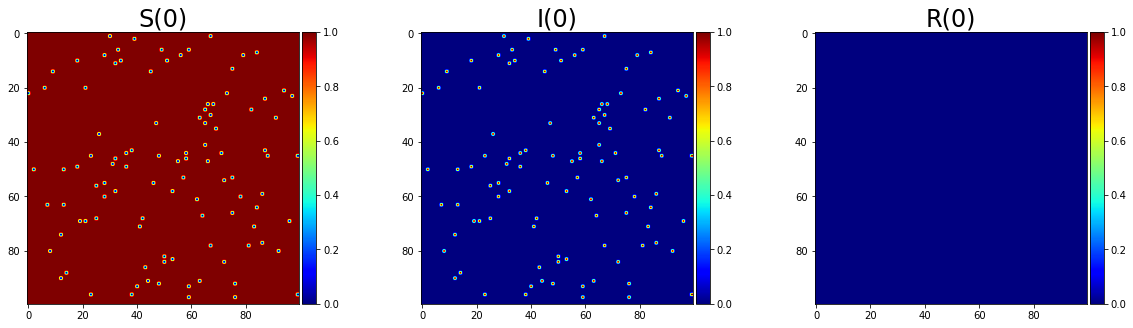

In [97]:
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

α, β = 1, 10
Ds, Di, Dr = (0., 12., 0.)
dimx, dimy = (100, 100)

It = np.random.choice([0., 1.], p=[0.99, 0.01], size=(dimx, dimy))
Rt = np.zeros(shape=(dimx, dimy))
St = np.ones(shape=(dimx, dimy)) - It

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for state, title, ax in zip([St, It, Rt], ['S(0)', 'I(0)', 'R(0)'], axes):
    im = ax.imshow(state, cmap='jet', vmin=0, vmax=1)
    ax.set_title(title, fontsize=24)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical', shrink=0.6)

In [98]:
from scipy.ndimage import laplace
import matplotlib.animation
from matplotlib import rc
import matplotlib
from IPython.display import HTML

matplotlib.rcParams['animation.embed_limit'] = 20971520*2

rc('animation', html='jshtml')

dt = 0.005

lap_s = np.empty_like(St)
lap_i = np.empty_like(It)
lap_r = np.empty_like(Rt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
im_I = ax.imshow(It, cmap='jet', interpolation='None', animated=True)
ax.axis('off')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im_I, cax=cax, orientation='vertical', shrink=0.6)
plt.close(fig)

def SIR_diffusion (frame_index):
        
    laplace(input=St, output=lap_s, mode='wrap')
    laplace(input=It, output=lap_i, mode='wrap')
    laplace(input=Rt, output=lap_r, mode='wrap')
    
    S = dt * (Ds * lap_s - β*It*St) + St
    I = dt * (Di * lap_i - α*It + β*It*St) + It
    R = dt * (Dr * lap_r + α*It) + Rt    
    
    Rt[:] = R
    It[:] = I
    St[:] = S
    
    im_I.set_data(I)
    
    im_I.set_clim(0, 1)
    
    ax.set_title('Iter: {:d}'.format(frame_index))    
    
    return im_I,

ani = matplotlib.animation.FuncAnimation(fig, SIR_diffusion, interval=100, frames=75, blit=False)
ani.save('animationSIR.gif', writer='pillow', fps=1)

HTML(ani.to_html5_video())